<a href="https://colab.research.google.com/github/Pgao4/Machine_learning_demo/blob/main/Heart_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><font size=5>ECE 710 - Project 3</font></center>
<center><b>Group Member: Pengfei Gao & Shuo Wang</b></center>

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Downsampling

In [54]:
# load the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data for Project 3.csv')

In [55]:
df.info()        # datatype
df.describe()    # mean, std

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1285421 entries, 0 to 1285420
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Empatica_ACCX  1221855 non-null  float64
 1   Empatica_ACCY  1221855 non-null  float64
 2   Empatica_ACCZ  1221855 non-null  float64
 3   Empatica_HR    305154 non-null   float64
 4   Hexoskin_HR    290924 non-null   float64
 5   Hexoskin_RR    290924 non-null   float64
 6   Hexoskin_ACCX  1163758 non-null  float64
 7   Hexoskin_ACCY  1163758 non-null  float64
 8   Hexoskin_ACCZ  1163758 non-null  float64
 9   Activity       1285386 non-null  object 
dtypes: float64(9), object(1)
memory usage: 98.1+ MB


,Empatica_ACCX,Empatica_ACCY,Empatica_ACCZ,Empatica_HR,Hexoskin_HR,Hexoskin_RR,Hexoskin_ACCX,Hexoskin_ACCY,Hexoskin_ACCZ
count,1.221855e+06,1.221855e+06,1.221855e+06,305154.000000,290924.000000,290924.000000,1.163758e+06,1.163758e+06,1.163758e+06
mean,1.475432e-01,-6.483944e-03,3.299203e-01,75.057116,76.437317,16.013223,3.249933e-02,-5.076208e-01,-4.558605e-02
std,6.489086e-01,4.466842e-01,4.942834e-01,15.830873,19.680226,4.393594,5.294778e-01,5.015478e-01,4.599337e-01
min,-1.950000e+00,-1.750000e+00,-1.700000e+00,47.030000,30.000000,3.000000,-2.000000e+00,-2.530000e+00,-1.280000e+00
25%,-4.200000e-01,-3.300000e-01,3.000000e-02,61.020000,60.000000,13.000000,-2.900000e-01,-9.400000e-01,-3.600000e-01
50%,2.500000e-01,-1.000000e-02,4.500000e-01,75.820000,75.000000,15.000000,1.000000e-02,-7.100000e-01,-1.100000e-01
75%,7.500000e-01,3.200000e-01,7.300000e-01,84.220000,87.000000,19.000000,4.000000e-01,-1.500000e-01,2.100000e-01
max,1.900000e+00,1.920000e+00,1.790000e+00,174.770000,187.000000,64.000000,2.000000e+00,1.020000e+00,1.420000e+00


In [56]:
df.head()

,Empatica_ACCX,Empatica_ACCY,Empatica_ACCZ,Empatica_HR,Hexoskin_HR,Hexoskin_RR,Hexoskin_ACCX,Hexoskin_ACCY,Hexoskin_ACCZ,Activity
0,NaN,NaN,NaN,NaN,NaN,NaN,0.31,-0.09,-0.71,Out
1,NaN,NaN,NaN,NaN,NaN,NaN,0.11,0.02,-0.88,Out
2,NaN,NaN,NaN,NaN,NaN,NaN,0.78,-0.34,0.09,Out
3,NaN,NaN,NaN,NaN,NaN,NaN,1.01,-0.82,0.17,Out
4,NaN,NaN,NaN,NaN,70.0,10.0,0.83,-0.47,0.33,Out


In [57]:
df['Activity'].isnull().value_counts()

False    1285386
True          35
Name: Activity, dtype: int64

In [58]:
df.dropna(subset=['Activity'],inplace=True)

In [59]:
df['Activity'].isnull().value_counts()

False    1285386
Name: Activity, dtype: int64

In [60]:
pd.value_counts(df['Activity'])

Home     527297
Sleep    469407
Out      288682
Name: Activity, dtype: int64

In [61]:
df['Activity'] = pd.factorize(df['Activity'])[0]

In [62]:
#downsampling
idx = len(df) // 3600 * 3600
downsample_df = df[:idx].groupby(df.index[:idx] // 3600).mean()
#downsample_df.loc[:, 'Activity'] = df['Activity'].groupby(df.index[:idx] // 3600).mode()
downsample_df['Activity'] = downsample_df['Activity'].round().astype(int)
downsample_df.info()        # datatype
downsample_df.describe()    # mean, std

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 0 to 357
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Empatica_ACCX  345 non-null    float64
 1   Empatica_ACCY  345 non-null    float64
 2   Empatica_ACCZ  345 non-null    float64
 3   Empatica_HR    345 non-null    float64
 4   Hexoskin_HR    327 non-null    float64
 5   Hexoskin_RR    327 non-null    float64
 6   Hexoskin_ACCX  327 non-null    float64
 7   Hexoskin_ACCY  327 non-null    float64
 8   Hexoskin_ACCZ  327 non-null    float64
 9   Activity       358 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 30.8 KB


,Empatica_ACCX,Empatica_ACCY,Empatica_ACCZ,Empatica_HR,Hexoskin_HR,Hexoskin_RR,Hexoskin_ACCX,Hexoskin_ACCY,Hexoskin_ACCZ,Activity
count,345.000000,345.000000,345.000000,345.000000,327.000000,327.000000,327.000000,327.000000,327.000000,358.000000
mean,0.147630,-0.006250,0.327669,75.228340,76.755762,16.053227,0.031390,-0.508203,-0.044859,1.134078
std,0.561520,0.301123,0.324861,13.731936,17.979876,3.271730,0.465120,0.468547,0.393580,0.758822
min,-1.000139,-0.842639,-0.847553,50.039033,36.124444,7.261111,-1.008839,-1.012681,-0.882628,0.000000
25%,-0.395597,-0.222700,0.129419,61.096644,60.232778,13.463889,-0.244798,-0.924878,-0.276781,1.000000
50%,0.265092,-0.013136,0.352864,77.606044,76.173333,15.143333,-0.008900,-0.672150,-0.082664,1.000000
75%,0.660025,0.228528,0.558736,84.529733,87.449444,18.452778,0.339257,-0.153953,0.105551,2.000000
max,0.923383,0.813886,0.939997,120.624756,136.103333,28.497778,0.970769,0.813403,1.007478,2.000000


In [63]:
downsample_df.head()

,Empatica_ACCX,Empatica_ACCY,Empatica_ACCZ,Empatica_HR,Hexoskin_HR,Hexoskin_RR,Hexoskin_ACCX,Hexoskin_ACCY,Hexoskin_ACCZ,Activity
0,0.795284,0.159251,-0.117983,96.270585,94.595106,21.598443,0.259794,-0.937000,-0.072819,0
1,0.915222,0.238342,-0.087453,84.465756,86.631111,20.985556,0.385361,-0.908225,-0.139608,0
2,0.613869,-0.500831,0.190033,101.095544,108.477778,21.255556,0.079933,-0.956011,-0.089336,0
3,0.550951,-0.098380,-0.342870,101.441057,118.619844,18.054627,-0.103989,-0.989064,-0.053262,0
4,0.387303,-0.842639,-0.049214,108.357011,119.595556,19.536667,-0.232897,-0.978850,-0.110114,0


In [64]:
pd.value_counts(downsample_df['Activity'])

1    146
2    130
0     82
Name: Activity, dtype: int64

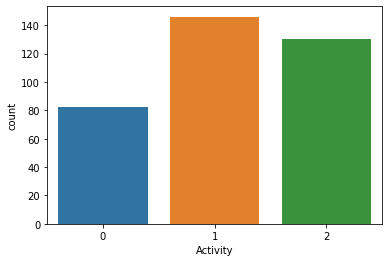

In [65]:
import seaborn as sns
sns.countplot(x='Activity', data=downsample_df)

# Peprocess

## Highly Correlated Features

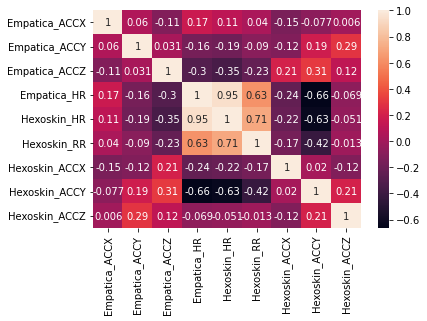

In [66]:
#Visual
correlation_matrix = downsample_df.iloc[:, 0:9].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [67]:
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.85:
            sum_i = 0
            sum_j = 0
            for k in range(len(correlation_matrix.columns)):
                sum_i += abs(correlation_matrix.iloc[i, k])
                sum_j += abs(correlation_matrix.iloc[j, k])
            if sum_i > sum_j:  
              correlated_features.add(correlation_matrix.columns[i])
            else:  
              correlated_features.add(correlation_matrix.columns[j])

In [68]:
print(correlated_features)

{'Hexoskin_HR'}


In [69]:
#delete highly correlated features
downsample_df.drop(labels=correlated_features, axis=1, inplace=True)
downsample_df.head()

,Empatica_ACCX,Empatica_ACCY,Empatica_ACCZ,Empatica_HR,Hexoskin_RR,Hexoskin_ACCX,Hexoskin_ACCY,Hexoskin_ACCZ,Activity
0,0.795284,0.159251,-0.117983,96.270585,21.598443,0.259794,-0.937000,-0.072819,0
1,0.915222,0.238342,-0.087453,84.465756,20.985556,0.385361,-0.908225,-0.139608,0
2,0.613869,-0.500831,0.190033,101.095544,21.255556,0.079933,-0.956011,-0.089336,0
3,0.550951,-0.098380,-0.342870,101.441057,18.054627,-0.103989,-0.989064,-0.053262,0
4,0.387303,-0.842639,-0.049214,108.357011,19.536667,-0.232897,-0.978850,-0.110114,0


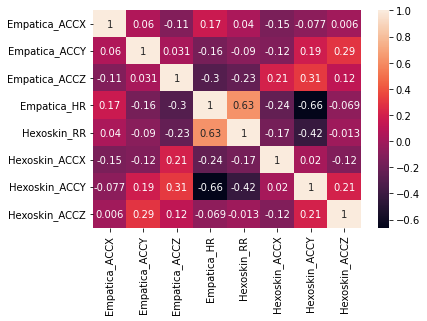

In [70]:
#check correlations
correlation_matrix = downsample_df.iloc[:, 0:8].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

## Outlier Removal

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


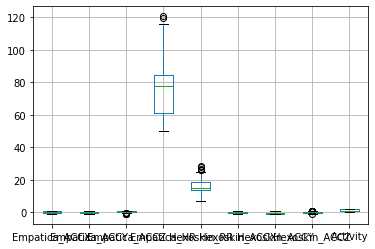

In [71]:
downsample_df.boxplot()

In [72]:
for i in downsample_df:
  if i == 'Activity':
    continue
  Q1 = downsample_df[i].quantile(0.25)
  Q3 = downsample_df[i].quantile(0.75)
  IQR = Q3 - Q1 
  max = Q3+(1.5*IQR)
  min = Q1-(1.5*IQR)
  for j in downsample_df.index:
    if downsample_df.loc[j,i] < min:
      downsample_df.loc[j,i] = np.nan
    if downsample_df.loc[j,i] > max:
      downsample_df.loc[j,i] = np.nan

In [73]:
downsample_df.isnull().sum()

Empatica_ACCX    13
Empatica_ACCY    13
Empatica_ACCZ    20
Empatica_HR      15
Hexoskin_RR      36
Hexoskin_ACCX    31
Hexoskin_ACCY    31
Hexoskin_ACCZ    53
Activity          0
dtype: int64

## Missing data

In [74]:
#delete NA value
downsample_df.dropna(axis=0, how='any', inplace=True)

In [75]:
downsample_df.isnull().sum()

Empatica_ACCX    0
Empatica_ACCY    0
Empatica_ACCZ    0
Empatica_HR      0
Hexoskin_RR      0
Hexoskin_ACCX    0
Hexoskin_ACCY    0
Hexoskin_ACCZ    0
Activity         0
dtype: int64

In [76]:
downsample_df.info()        # datatype
downsample_df.describe()    # mean, std

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282 entries, 0 to 357
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Empatica_ACCX  282 non-null    float64
 1   Empatica_ACCY  282 non-null    float64
 2   Empatica_ACCZ  282 non-null    float64
 3   Empatica_HR    282 non-null    float64
 4   Hexoskin_RR    282 non-null    float64
 5   Hexoskin_ACCX  282 non-null    float64
 6   Hexoskin_ACCY  282 non-null    float64
 7   Hexoskin_ACCZ  282 non-null    float64
 8   Activity       282 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 22.0 KB


,Empatica_ACCX,Empatica_ACCY,Empatica_ACCZ,Empatica_HR,Hexoskin_RR,Hexoskin_ACCX,Hexoskin_ACCY,Hexoskin_ACCZ,Activity
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,0.107930,-0.030799,0.334997,75.827229,16.050993,0.013593,-0.549568,-0.097545,1.187943
std,0.575326,0.298674,0.287437,13.357783,2.981284,0.477581,0.458889,0.322750,0.682884
min,-0.927153,-0.842639,-0.390811,50.270944,7.261111,-1.008839,-1.010647,-0.831575,0.000000
25%,-0.492124,-0.238963,0.136870,62.379592,13.586389,-0.267157,-0.928469,-0.281387,1.000000
50%,0.193989,-0.036942,0.325749,77.610206,15.715556,-0.008278,-0.805358,-0.091117,1.000000
75%,0.657863,0.183577,0.534010,85.024097,18.464722,0.309580,-0.192033,0.049817,2.000000
max,0.923383,0.813886,0.939997,115.697544,24.921875,0.970769,0.813403,0.665086,2.000000


In [82]:
pd.value_counts(downsample_df['Activity'])

1    141
2     97
0     44
Name: Activity, dtype: int64

## Normalization

In [97]:
#First split data into training-validation-test sets
#train, validate, test = np.split(downsample_df.sample(frac=1, random_state=42), [int(.6*len(downsample_df)), int(.8*len(downsample_df))])
#stratifying
grouped_df = downsample_df.groupby('Activity')
arr_list = [np.split(g, [int(.8 * len(g)), int(.9 * len(g))]) for i, g in grouped_df]

train = pd.concat([t[0] for t in arr_list])
test = pd.concat([t[1] for t in arr_list])
validate = pd.concat([v[2] for v in arr_list])

In [98]:
train.head()

,Empatica_ACCX,Empatica_ACCY,Empatica_ACCZ,Empatica_HR,Hexoskin_RR,Hexoskin_ACCX,Hexoskin_ACCY,Hexoskin_ACCZ,Activity
0,0.795284,0.159251,-0.117983,96.270585,21.598443,0.259794,-0.937000,-0.072819,0
1,0.915222,0.238342,-0.087453,84.465756,20.985556,0.385361,-0.908225,-0.139608,0
2,0.613869,-0.500831,0.190033,101.095544,21.255556,0.079933,-0.956011,-0.089336,0
3,0.550951,-0.098380,-0.342870,101.441057,18.054627,-0.103989,-0.989064,-0.053262,0
4,0.387303,-0.842639,-0.049214,108.357011,19.536667,-0.232897,-0.978850,-0.110114,0


In [99]:
# use the .mean() and .std() methods to apply the z-score method in Pandas
# use the mean and std of train set to normalization validation set and test set
for column in train.columns:
  if column == 'Activity':
    continue
  validate[column] = (validate[column] - train[column].mean()) / train[column].std()
  test[column] = (test[column] - train[column].mean()) / train[column].std()

In [100]:
for column in train.columns:
  if column == 'Activity':
    continue
  train[column] = (train[column] - train[column].mean()) / train[column].std()

In [101]:
train.head()

,Empatica_ACCX,Empatica_ACCY,Empatica_ACCZ,Empatica_HR,Hexoskin_RR,Hexoskin_ACCX,Hexoskin_ACCY,Hexoskin_ACCZ,Activity
0,1.053808,0.605648,-1.539506,1.507936,1.759702,0.526984,-0.813237,0.050384,0
1,1.273431,0.869113,-1.434671,0.656473,1.560057,0.793391,-0.754415,-0.153447,0
2,0.721616,-1.593190,-0.481842,1.855952,1.648009,0.145384,-0.852100,-0.000023,0
3,0.606404,-0.252562,-2.311719,1.880873,0.605321,-0.244832,-0.919667,0.110071,0
4,0.306744,-2.731809,-1.303366,2.379709,1.088089,-0.518329,-0.898787,-0.063434,0


In [102]:
validate.head()

,Empatica_ACCX,Empatica_ACCY,Empatica_ACCZ,Empatica_HR,Hexoskin_RR,Hexoskin_ACCX,Hexoskin_ACCY,Hexoskin_ACCZ,Activity
353,-1.749826,1.647356,-0.717638,0.814420,0.643266,-0.103119,-0.879606,0.145458,0
354,-1.803788,1.587330,-0.264082,0.752440,0.865134,-0.263650,-0.963787,0.489157,0
355,-1.827394,0.817526,-0.334647,0.817642,0.997604,-0.012867,-0.876505,0.337352,0
356,-1.910680,0.261056,-0.212117,0.600718,1.026921,0.134010,-0.861492,-0.238764,0
357,-1.795160,0.570074,-1.136338,1.672436,0.225588,0.303739,-0.863174,-0.445006,0


In [103]:
test.head()

,Empatica_ACCX,Empatica_ACCY,Empatica_ACCZ,Empatica_HR,Hexoskin_RR,Hexoskin_ACCX,Hexoskin_ACCY,Hexoskin_ACCZ,Activity
349,-1.821163,0.932997,-1.809851,1.200896,1.490565,0.102273,-0.889378,-0.175420,0
350,-1.829571,-1.106664,-1.508621,0.727073,1.457991,0.311219,-0.788372,-0.601495,0
351,-1.710568,0.347860,0.454324,0.587020,0.331274,0.168946,-0.863786,-0.059144,0
352,-1.836448,1.584462,-1.140672,1.173702,0.206043,-0.257032,-0.876375,0.367447,0
256,0.247372,0.363095,0.845152,-0.188256,0.586364,0.953546,-0.196506,-0.676917,1


## Class Imbalance

In [104]:
train.head()

,Empatica_ACCX,Empatica_ACCY,Empatica_ACCZ,Empatica_HR,Hexoskin_RR,Hexoskin_ACCX,Hexoskin_ACCY,Hexoskin_ACCZ,Activity
0,1.053808,0.605648,-1.539506,1.507936,1.759702,0.526984,-0.813237,0.050384,0
1,1.273431,0.869113,-1.434671,0.656473,1.560057,0.793391,-0.754415,-0.153447,0
2,0.721616,-1.593190,-0.481842,1.855952,1.648009,0.145384,-0.852100,-0.000023,0
3,0.606404,-0.252562,-2.311719,1.880873,0.605321,-0.244832,-0.919667,0.110071,0
4,0.306744,-2.731809,-1.303366,2.379709,1.088089,-0.518329,-0.898787,-0.063434,0


## One-hot encode

In [91]:
#one-hot for train set
one_hot = pd.get_dummies(train['Activity'])
#drop column activity as it is now encoded
train = train.drop('Activity', axis = 1) 
#join the encoded df
train = train.join(one_hot)

In [92]:
train.head()

,Empatica_ACCX,Empatica_ACCY,Empatica_ACCZ,Empatica_HR,Hexoskin_RR,Hexoskin_ACCX,Hexoskin_ACCY,Hexoskin_ACCZ,0,1,2
0,1.053808,0.605648,-1.539506,1.507936,1.759702,0.526984,-0.813237,0.050384,1,0,0
1,1.273431,0.869113,-1.434671,0.656473,1.560057,0.793391,-0.754415,-0.153447,1,0,0
2,0.721616,-1.593190,-0.481842,1.855952,1.648009,0.145384,-0.852100,-0.000023,1,0,0
3,0.606404,-0.252562,-2.311719,1.880873,0.605321,-0.244832,-0.919667,0.110071,1,0,0
4,0.306744,-2.731809,-1.303366,2.379709,1.088089,-0.518329,-0.898787,-0.063434,1,0,0


In [93]:
#one-hot for validation set
one_hot = pd.get_dummies(validate['Activity'])
validate = validate.drop('Activity', axis = 1) 
validate = validate.join(one_hot)

In [94]:
#one-hot for teset set
one_hot = pd.get_dummies(test['Activity'])
test = test.drop('Activity', axis = 1) 
test = test.join(one_hot)